In [67]:
import pandas as pd

In [68]:
df_orders_2015_2017 = pd.read_csv('orders_2015_2017.csv')
df_orders_2015_2017.head()
df_orders_2018_2020 = pd.read_csv('orders_2018_2020.csv')
df_orders_2018_2020.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,MX-2020-3699870,2020-01-30,2020-01-30,Second Class,RR-19525,TEC-AC-10003857,155.39,4,0.07,0.00,27604.0,3688.0
1,IN-2020-1242825,2020-01-30,2020-01-30,Second Class,MG-17695,TEC-AC-10003750,300.24,3,0.27,0.19,NaN,1573.0
2,ES-2020-4770782,2020-01-30,2020-01-31,Same Day,ES-14020,OFF-SU-10004279,260.82,6,0.32,0.23,NaN,13836.0
3,ES-2020-4909028,2020-01-30,2020-02-01,Second Class,RD-19480,OFF-ST-10002159,557.28,3,0.32,0.23,NaN,7494.0
4,CA-2020-2617354,2020-01-30,2020-01-31,Second Class,PO-18865,TEC-PH-10004774,90.93,7,0.27,0.19,97301.0,4553.0


In [69]:
# Union both orders 2015-2017 & 2018-2020
df_orders = pd.concat([df_orders_2015_2017,df_orders_2018_2020],ignore_index=True)
df_orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,ES-2017-5108975,2017-12-31,2018-01-02,Second Class,CG-12520,OFF-BI-10002040,246.48,8,0.32,0.29,NaN,3855.0
1,ID-2017-1953711,2017-12-31,2018-01-03,Standard Class,RL-19615,FUR-BO-10001934,1637.01,5,0.22,0.20,NaN,4792.0
2,US-2017-156052,2017-12-31,2018-01-01,Second Class,JO-15145,OFF-BI-10001460,106.05,7,0.32,0.29,NaN,4023.0
3,CA-2017-3997214,2017-12-31,2018-01-05,Same Day,JB-15925,OFF-FA-10000585,5.58,2,0.12,0.10,NaN,16436.0
4,IN-2017-10720,2017-12-31,2018-01-04,Second Class,KT-16480,TEC-MA-10002340,241.32,2,0.55,82.02,NaN,1573.0


In [70]:
# read products, return, region
df_products = pd.read_csv('products.csv',encoding='ISO-8859-1')
df_products.head()
df_returns = pd.read_csv('returns.csv')
df_returns.head()
df_regions = pd.read_csv('regions.csv')
df_regions.head()

,region_id,country_code,country,region,sub_region,salesperson
0,45585,TH,Thailand,APAC,South-Eastern Asia,Fei Hong
1,4364,PA,Panama,Americas,Central America,Anna Andreadi
2,7530,UA,Ukraine,EMEA,Eastern Europe,Giulietta Dortch
3,28804,KR,South Korea,APAC,Eastern Asia,Wang Xiu Ying
4,4119,SK,Slovakia,EMEA,Eastern Europe,Giulietta Dortch


In [71]:
df_orders_returns = pd.merge(df_orders,df_returns,how='left',on=['order_id','product_id'])
df_orders_returns.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,return_date,return_quantity,reason_returned
0,ES-2017-5108975,2017-12-31,2018-01-02,Second Class,CG-12520,OFF-BI-10002040,246.48,8,0.32,0.29,NaN,3855.0,NaN,NaN,NaN
1,ID-2017-1953711,2017-12-31,2018-01-03,Standard Class,RL-19615,FUR-BO-10001934,1637.01,5,0.22,0.20,NaN,4792.0,NaN,NaN,NaN
2,US-2017-156052,2017-12-31,2018-01-01,Second Class,JO-15145,OFF-BI-10001460,106.05,7,0.32,0.29,NaN,4023.0,NaN,NaN,NaN
3,CA-2017-3997214,2017-12-31,2018-01-05,Same Day,JB-15925,OFF-FA-10000585,5.58,2,0.12,0.10,NaN,16436.0,NaN,NaN,NaN
4,IN-2017-10720,2017-12-31,2018-01-04,Second Class,KT-16480,TEC-MA-10002340,241.32,2,0.55,82.02,NaN,1573.0,NaN,NaN,NaN


In [72]:
comments = {
    "Wrong Item" : "Check with fulfillment center.",
    "Wrong Color" : "Check with fulfillment center.",
    "Not Needed" : "Check the item.",
    "Not Given" : "Contact customer."
}

In [73]:
df_orders_returns['comments'] = df_orders_returns['reason_returned'].map(comments)
df_orders_returns.query("reason_returned.notnull()")

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,return_date,return_quantity,reason_returned,comments
9,IN-2017-1126741,2017-12-31,2017-12-31,Second Class,MV-18190,OFF-ST-10001357,1603.31,9,0.07,0.05,NaN,1864.0,26/01/2018 00:00,1.0,Not Needed,Check the item.
27,MX-2017-4290536,2017-12-31,2018-01-05,Standard Class,TH-21115,FUR-BO-10002235,385.92,4,0.22,0.20,NaN,15598.0,21/01/2018 00:00,1.0,Wrong Item,Check with fulfillment center.
36,CA-2017-2134989,2017-12-31,2018-01-02,Same Day,RE-19450,OFF-PA-10003228,195.64,4,0.22,0.20,NaN,1826.0,27/01/2018 00:00,1.0,Not Given,Contact customer.
44,CA-2017-3799950,2017-12-31,2018-01-02,Standard Class,TZ-21580,FUR-FU-10004270,25.08,6,0.27,0.24,NaN,3855.0,22/01/2018 00:00,1.0,Not Given,Contact customer.
71,MX-2017-145597,2017-12-31,2018-01-01,First Class,TH-21115,FUR-BO-10002235,385.92,4,0.20,138.88,NaN,7494.0,23/01/2018 00:00,1.0,Wrong Item,Check with fulfillment center.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990623,ID-2018-4093335,2018-01-01,2018-01-01,Standard Class,CD-12280,FUR-TA-10000989,2993.03,5,0.23,0.19,60098.0,1488.0,28/01/2018 00:00,1.0,Wrong Item,Check with fulfillment center.
990626,MX-2018-655417,2018-01-01,2018-01-05,Same Day,DK-13150,OFF-SU-10001368,103.88,14,0.08,0.05,NaN,1784.0,26/01/2018 00:00,1.0,Wrong Color,Check with fulfillment center.
990631,IN-2018-2551875,2018-01-01,2018-01-06,Second Class,HD-14785,TEC-PH-10000720,976.78,7,0.38,0.34,NaN,1573.0,26/01/2018 00:00,1.0,Wrong Item,Check with fulfillment center.
990649,CA-2018-1081664,2018-01-01,2018-01-05,Standard Class,DK-13375,OFF-AR-10004078,37.38,8,0.23,0.19,NaN,1784.0,09/01/2018 00:00,1.0,Wrong Color,Check with fulfillment center.


In [74]:
# Join df_orders with df_products

df_oreder_products = pd.merge(df_orders,df_products,how= 'left' , on = ['product_id'])
df_oreder_products.head()


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,category,sub_category,product_name,product_cost_to_consumer
0,ES-2017-5108975,2017-12-31,2018-01-02,Second Class,CG-12520,OFF-BI-10002040,246.48,8,0.32,0.29,NaN,3855.0,Office Supplies,Binders,"Ibico 3-Hole Punch, Recycled",30.81
1,ID-2017-1953711,2017-12-31,2018-01-03,Standard Class,RL-19615,FUR-BO-10001934,1637.01,5,0.22,0.20,NaN,4792.0,Furniture,Bookcases,"Bush Library with Doors, Metal",229.18
2,US-2017-156052,2017-12-31,2018-01-01,Second Class,JO-15145,OFF-BI-10001460,106.05,7,0.32,0.29,NaN,4023.0,Office Supplies,Binders,Plastic Binding Combs,12.12
3,CA-2017-3997214,2017-12-31,2018-01-05,Same Day,JB-15925,OFF-FA-10000585,5.58,2,0.12,0.10,NaN,16436.0,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,2.79
4,IN-2017-10720,2017-12-31,2018-01-04,Second Class,KT-16480,TEC-MA-10002340,241.32,2,0.55,82.02,NaN,1573.0,Technology,Machines,"Konica Receipt Printer, White",120.66


In [75]:
# Join df_orders with df_regions


# Join df_orders with df_regions
df_orders_regions = pd.merge(df_orders,df_regions,how = 'inner', on = ['region_id'])
df_orders_regions.head()



,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,country_code,country,region,sub_region,salesperson
0,ES-2017-5108975,2017-12-31,2018-01-02,Second Class,CG-12520,OFF-BI-10002040,246.48,8,0.32,0.29,NaN,3855.0,PH,Philippines,APAC,South-Eastern Asia,Fei Hong
1,ID-2017-1953711,2017-12-31,2018-01-03,Standard Class,RL-19615,FUR-BO-10001934,1637.01,5,0.22,0.20,NaN,4792.0,AU,Australia,APAC,Oceania,Nora Preis
2,US-2017-156052,2017-12-31,2018-01-01,Second Class,JO-15145,OFF-BI-10001460,106.05,7,0.32,0.29,NaN,4023.0,PL,Poland,EMEA,Eastern Europe,Giulietta Dortch
3,CA-2017-3997214,2017-12-31,2018-01-05,Same Day,JB-15925,OFF-FA-10000585,5.58,2,0.12,0.10,NaN,16436.0,HU,Hungary,EMEA,Eastern Europe,Giulietta Dortch
4,IN-2017-10720,2017-12-31,2018-01-04,Second Class,KT-16480,TEC-MA-10002340,241.32,2,0.55,82.02,NaN,1573.0,DE,Germany,EMEA,Western Europe,Anna Andreadi


In [76]:
# Join df_returns with df_products
# Join df_returns with df_products
df_returns_product = pd.merge(df_returns,df_products,right_on='product_id', left_on = 'product_id',how = 'left')
df_returns_product.head()

,order_id,return_date,return_quantity,reason_returned,product_id,category,sub_category,product_name,product_cost_to_consumer
0,IN-2019-507567,28/03/2019 00:00,1,Wrong Item,TEC-CO-10003777,Technology,Copiers,"Hewlett Copy Machine, Color",235.68
1,US-2019-2357004,21/01/2019 00:00,1,Wrong Item,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,5.34
2,ES-2016-1001989,21/03/2016 00:00,1,Not Given,OFF-BI-10002570,Office Supplies,Binders,"Cardinal 3-Hole Punch, Clear",28.26
3,ES-2018-2488519,30/11/2018 00:00,1,Not Given,OFF-AP-10002476,Office Supplies,Appliances,"Cuisinart Blender, Red",60.29
4,IN-2018-1375350,02/11/2018 00:00,1,Not Needed,TEC-AC-10004848,Technology,Accessories,"SanDisk Memory Card, Erganomic",110.22


In [77]:
# View return reasons
df_returns_product['reason_returned'].value_counts()

reason_returned
Not Given      18988
Wrong Item     15947
Wrong Color     7928
Not Needed      6639
Name: count, dtype: int64

In [78]:

bahrain_mask = df_orders_regions['country']== 'Bahrain'
df_orders_regions[bahrain_mask]
df_orders_regions[bahrain_mask].shape

(38, 17)

In [79]:
df_orders.groupby(by='ship_mode')[['order_id']].count()

,order_id
ship_mode,
First Class,51911
Same Day,204627
Second Class,333013
Standard Class,401126


In [80]:
df_orders.groupby(by='ship_mode')[['order_id']].nunique()

,order_id
ship_mode,
First Class,48451
Same Day,203334
Second Class,328143
Standard Class,386622


In [81]:
df_oreder_products.groupby('sub_category')['sales'].mean().sort_values(ascending=False).head(10)
df_oreder_products.groupby('sub_category')[['sales']].mean()\
    .sort_values(by='sales',ascending=False).head(10)

,sales
sub_category,
Tables,871.411047
Copiers,691.759778
Bookcases,603.179678
Appliances,590.460082
Machines,509.530829
Phones,501.645092
Chairs,430.740283
Accessories,249.254697
Storage,221.554769


In [82]:
df_orders_returns_regions = pd.merge(df_orders_returns,df_regions,how ='inner',on = ['region_id'])
salesperson_groupby = df_orders_returns_regions.groupby('salesperson').agg({'sales':'mean','profit':'mean','return_quantity':'sum','order_id':'count'})

In [100]:
salesperson_groupby.style.background_gradient()



,sales,profit,return_quantity,order_id
salesperson,,,,
Agwe Aristide,244.433066,1.389336,1730.000000,32997
Anna Andreadi,245.359407,1.552200,9010.000000,171637
Annelise Williams,248.353878,1.127458,2288.000000,44170
Beatrice Top,242.664719,1.523869,4988.000000,93229
Chuck Magee,246.838372,1.622100,5095.000000,97526
Deborah Brumfield,246.465099,1.647610,4656.000000,89105
Fei Hong,246.601237,1.779061,3099.000000,60162
Giulietta Dortch,246.759310,1.609437,4940.000000,95893
Kelly Williams,245.828805,1.522654,2890.000000,54889


In [101]:
salesperson_groupby.corr().style.background_gradient()

,sales,profit,return_quantity,order_id
sales,1.000000,0.006850,-0.284607,-0.278261
profit,0.006850,1.000000,-0.111059,-0.102748
return_quantity,-0.284607,-0.111059,1.000000,0.999753
order_id,-0.278261,-0.102748,0.999753,1.000000


In [102]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 


<Axes: xlabel='country'>

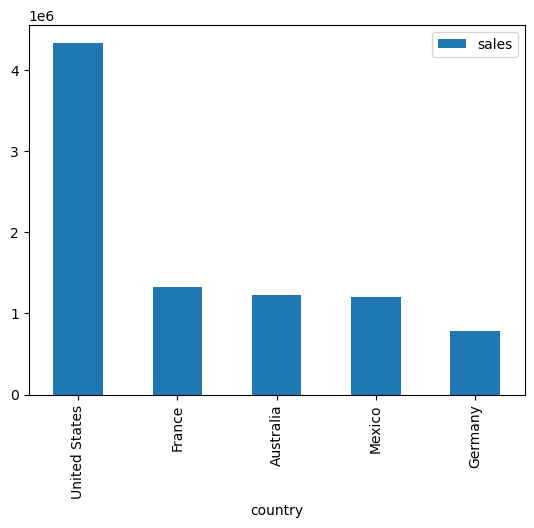

In [115]:
returned_mask = df_orders_returns_regions['return_quantity'].notnull()

top_5_sales = df_orders_returns_regions[returned_mask].groupby('country')[['sales']].sum()


top_5_sales = top_5_sales.nlargest(5,'sales')

top_5_sales.reset_index().plot(kind='bar',x='country',y='sales')


<Axes: ylabel='salesperson'>

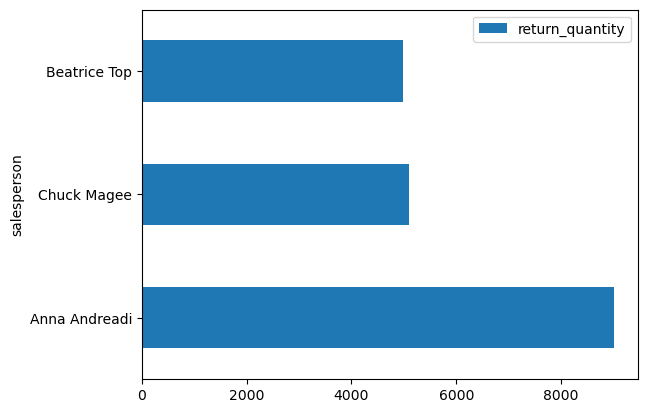

In [126]:
# disply the top 3 sales person qith most returns (quantity)

top_3_salespeson_return_qty = df_orders_returns_regions[returned_mask].groupby('salesperson')[['return_quantity']].sum()
top_3_salespeson_return_qty.nlargest(3,'return_quantity')
top_3_salespeson_return_qty= top_3_salespeson_return_qty.nlargest(3,'return_quantity')

top_3_salespeson_return_qty.reset_index().plot(kind = 'barh', y='return_quantity',x='salesperson')

C:\Users\USER\AppData\Local\Temp\ipykernel_17988\1616096250.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_17988\1616096250.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



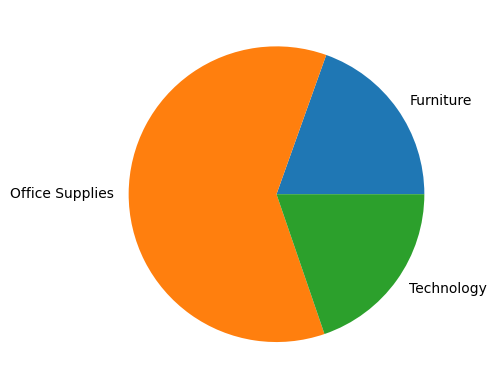

In [141]:
df_oreder_returns_product = pd.merge(df_orders_returns,df_products,how='inner',on='product_id')
cat_tot_orders = df_oreder_returns_product[['category','quantity','return_quantity']]
cat_tot_orders['return_quantity'] = cat_tot_orders['return_quantity'].fillna(0)
cat_tot_orders['total_quantity'] = cat_tot_orders['quantity']-cat_tot_orders['return_quantity']
category_tot_qty = cat_tot_orders.groupby('category')[['total_quantity']].sum().reset_index()
category_tot_qty


import matplotlib.pyplot as plt 
plt.pie(data=category_tot_qty,x='total_quantity',labels="category")
plt.show()